In [1]:
import numpy as np
from scipy import stats 
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker

In [2]:
engine = create_engine("postgresql:///music", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
con = engine.connect()

2019-05-09 15:43:35,123 INFO sqlalchemy.engine.base.Engine select version()
2019-05-09 15:43:35,124 INFO sqlalchemy.engine.base.Engine {}
2019-05-09 15:43:35,126 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-05-09 15:43:35,126 INFO sqlalchemy.engine.base.Engine {}
2019-05-09 15:43:35,128 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-09 15:43:35,129 INFO sqlalchemy.engine.base.Engine {}
2019-05-09 15:43:35,130 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-09 15:43:35,130 INFO sqlalchemy.engine.base.Engine {}
2019-05-09 15:43:35,131 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-05-09 15:43:35,132 INFO sqlalchemy.engine.base.Engine {}


In [3]:
query = """
    SELECT count(score), author
    FROM reviews
    GROUP BY author
    """
result = con.execute(query).fetchall()
result[:10]

2019-05-09 15:43:35,138 INFO sqlalchemy.engine.base.Engine 
    SELECT count(score), author
    FROM reviews
    GROUP BY author
    
2019-05-09 15:43:35,139 INFO sqlalchemy.engine.base.Engine {}


[(2, 'jesse fahnestock'),
 (1, 'edwin stats houghton'),
 (1, 'the pitchfork staff'),
 (62, 'kim kelly'),
 (1, 'stephen may'),
 (67, "andy o'connor"),
 (36, 'michael idov'),
 (136, 'eric harvey'),
 (15, 'kris ex'),
 (1, 'minna zhou ')]

In [4]:
num_reviews_per_author=[tup[0] for tup in result]
np.mean(num_reviews_per_author), np.median(num_reviews_per_author)

(42.576388888888886, 10.0)

(array([289.,  46.,  30.,   9.,   7.,   9.,   7.,   5.,   1.,   2.,   8.,
          0.,   1.,   6.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  21.375,  41.75 ,  62.125,  82.5  , 102.875, 123.25 ,
        143.625, 164.   , 184.375, 204.75 , 225.125, 245.5  , 265.875,
        286.25 , 306.625, 327.   , 347.375, 367.75 , 388.125, 408.5  ,
        428.875, 449.25 , 469.625, 490.   , 510.375, 530.75 , 551.125,
        571.5  , 591.875, 612.25 , 632.625, 653.   , 673.375, 693.75 ,
        714.125, 734.5  , 754.875, 775.25 , 795.625, 816.   ]),
 <a list of 40 Patch objects>)

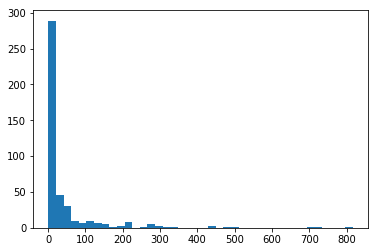

In [5]:
plt.hist(num_reviews_per_author, bins=40)

In [6]:
query = """
    SELECT author, avg(score), count(score)
    FROM reviews
    GROUP BY author
    HAVING count(score) > 42.5
    ORDER BY avg(score)
    """
result = con.execute(query).fetchall()
result[:10]

2019-05-09 15:43:35,640 INFO sqlalchemy.engine.base.Engine 
    SELECT author, avg(score), count(score)
    FROM reviews
    GROUP BY author
    HAVING count(score) > 42.5
    ORDER BY avg(score)
    
2019-05-09 15:43:35,641 INFO sqlalchemy.engine.base.Engine {}


[('alison fields', 5.81086954555434, 46),
 ('adam moerder', 6.15167464936179, 209),
 ('brent dicrescenzo', 6.16344088620396, 93),
 ('joshua love', 6.34205610284181, 107),
 ('liz colville', 6.34339625430557, 53),
 ('ian cohen', 6.35393419744545, 699),
 ('rob mitchum', 6.3928838886795, 267),
 ('jordan sargent', 6.48644069493827, 59),
 ('cory d. byrom', 6.50793650415209, 63),
 ('evan rytlewski', 6.51509436121527, 53)]

In [7]:
query = """
    SELECT score
    FROM reviews
    WHERE author = 'alison fields'
    """
result = con.execute(query).fetchall()
result[:3]

2019-05-09 15:43:35,926 INFO sqlalchemy.engine.base.Engine 
    SELECT score
    FROM reviews
    WHERE author = 'alison fields'
    
2019-05-09 15:43:35,928 INFO sqlalchemy.engine.base.Engine {}


[(5.5,), (5.9,), (6.0,)]

In [8]:
alison_reviews = [tup[0] for tup in result]

In [10]:
mu_pop = 7.005779372587398
alpha = 0.2
t_val, p_val = stats.ttest_1samp(alison_reviews, mu_pop)
t_crit = stats.t.ppf(1-alpha, len(alison_reviews)-1)

In [21]:
t_val, t_crit, np.abs(t_val) > np.abs(t_crit)

(-4.535080661412207, 0.8496819044581843, True)

In [22]:
p_val, alpha, p_val < alpha

(4.2481512426639494e-05, 0.2, True)

In [24]:
query = """
    SELECT score
    FROM reviews
"""
result = con.execute(query).fetchall()
scores_all_labels = np.array(result)

2019-05-07 16:55:40,178 INFO sqlalchemy.engine.base.Engine 
    SELECT score
    FROM reviews

2019-05-07 16:55:40,180 INFO sqlalchemy.engine.base.Engine {}


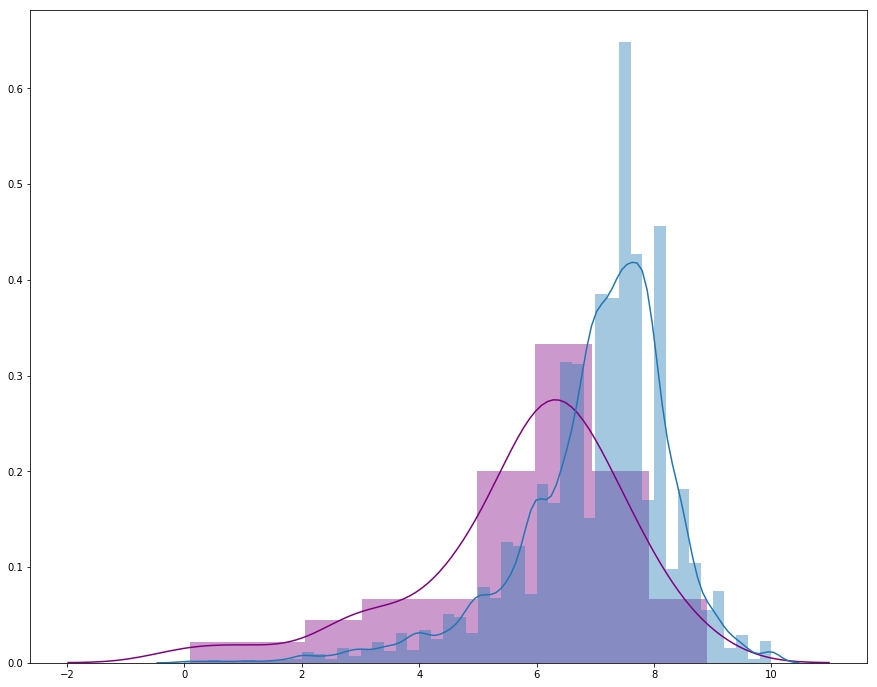

In [30]:
plt.figure(figsize=(15,12))
sns.distplot(alison_reviews, color='purple')
sns.distplot(scores_all_labels)